In [1]:
import matplotlib
import pandas as pd
matplotlib.rcParams['figure.figsize'] = [30.0, 20.0]
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn import preprocessing
import pprint as pp 

In [3]:
data_all = pd.read_csv("data_pg_v2.0.csv")

In [4]:
data_all

Player   Tm Pos    salary  GS    MP   PER   OWS  DWS  \
0              D.J. Augustin  DET  PG   3000000  13  1287  15.8   2.0  0.6   
1              D.J. Augustin  OKC  PG   3000000   1   677  10.2   0.5  0.4   
2                 J.J. Barea  DAL  PG   4000000  10  1362  15.1   2.1  0.6   
3             Jerryd Bayless  MIL  PG   3000000   4  1717  11.1   0.3  2.0   
4           Patrick Beverley  HOU  PG   6500000  55  1727  11.3   1.7  1.8   
5               Eric Bledsoe  PHO  PG  13086957  81  2800  18.4   4.1  2.9   
6               Aaron Brooks  CHI  PG   2000000  21  1885  14.4   1.7  1.5   
7                 Trey Burke  UTA  PG   2658240  43  2288  12.6   0.8  1.6   
8              Jose Calderon  NYK  PG   7708427  42  1270  11.3   0.8  0.1   
9              Isaiah Canaan  HOU  PG    997547   9   369  11.8   0.3  0.3   
10             Isaiah Canaan  PHI  PG    997547  12   569  12.8   0.4  0.3   
11   Michael Carter-Williams  PHI  PG   2399040  38  1391  12.8  -2.1  1.6   
12   Michael Carter-Williams  MIL  PG   2399040  25   758  16.3   0.0  1.3   
13           Jordan Clarkson  LAL  PG    845059  38  1476  16.9   2.0  0.4   
14               Norris Cole  MIA  PG   2038206  23  1148   9.9  -0.1  0.8   
15               Norris Cole  NOP  PG   2038206   2   683  12.6   0.5  0.3   
16           Darren Collison  SAC  PG   5013559  45  1565  17.5   3.0  0.8   
17               Mike Conley  MEM  PG   9588426  70  2225  18.6   4.2  2.7   
18                Seth Curry  PHO  PG    947276   0     8 -11.4  -0.1  0.0   
19             Stephen Curry  GSW  PG  11370786  80  2613  28.0  11.5  4.1   
20         Spencer Dinwiddie  DET  PG    845059   1   455  10.2  -0.3  0.4   
21              Goran Dragic  MIA  PG  14780000  26   905  18.8   2.3  0.5   
22               Tyler Ennis  PHO  PG   1662360   0    58  12.0   0.0  0.0   
23               Tyler Ennis  MIL  PG   1662360   1   353   6.6  -0.8  0.4   
24                Dante Exum  UTA  PG   3777720  41  1817   5.7  -1.1  1.0   
25             Jordan Farmar  LAC  PG    510921   0   529   9.9   0.2  0.4   
26            Raymond Felton  DAL  PG   3950313   3   281  12.4   0.0  0.2   
27               Tim Frazier  PHI  PG    144157   3   171   5.9  -0.4  0.1   
28               Tim Frazier  POR  PG    144157   0    68  13.7   0.1  0.1   
29         Langston Galloway  NYK  PG    845059  41  1457  12.3   0.7  0.6   
..                       ...  ...  ..       ...  ..   ...   ...   ...  ...   
240           Chasson Randle  NYK  PG    243860   0   225  12.3   0.3  0.1   
241            Brian Roberts  CHO  PG   1050961   2   416   9.8   0.0  0.3   
242         Sergio Rodriguez  PHI  PG   8000000  30  1518  11.0  -0.3  1.0   
243              Rajon Rondo  CHI  PG   3000000  42  1843  13.6  -0.3  2.7   
244             Derrick Rose  NYK  PG    290951  64  2082  17.0   2.4  0.6   
245             Terry Rozier  BOS  PG   1988520   0  1263  10.8   0.0  1.4   
246              Ricky Rubio  MIN  PG  14275000  75  2469  16.8   4.5  1.7   
247         D'Angelo Russell  LAL  PG   5562360  60  1811  15.3   0.3  1.0   
248          Dennis Schroder  ATL  PG  15500000  78  2485  16.1   1.2  2.5   
249           Ramon Sessions  CHO  PG    390706   1   811  12.3   0.3  0.6   
250                Ish Smith  DET  PG   6000000  32  1955  14.7   0.9  2.2   
251           Rodney Stuckey  IND  PG   7000000   0   696   9.5  -0.5  0.4   
252            Isaiah Taylor  HOU  PG   1312611   0    52   0.3  -0.1  0.0   
253              Jeff Teague  IND  PG  19000000  82  2657  19.2   5.7  2.4   
254            Isaiah Thomas  BOS  PG   6261395  76  2569  26.5  10.9  1.6   
255               Beno Udrih  DET  PG     25000   0   560  16.1   0.8  0.5   
256               Tyler Ulis  PHO  PG   1312611  15  1123  13.0   0.3  0.4   
257            Fred VanVleet  TOR  PG   1312611   0   294  10.5  -0.1  0.4   
258          Greivis Vasquez  BRK  PG   4347826   0    39   4.1   0.0  0.0   
259             Kemba Walker  CHO  PG  12000

In [5]:
X_all = data_all.iloc[:,4:]

In [6]:
X_all.values

array([[1.300e+01, 1.287e+03, 1.580e+01, ..., 3.300e+01, 1.100e+02,
        5.740e+02],
       [1.000e+00, 6.770e+02, 1.020e+01, ..., 1.600e+01, 3.500e+01,
        2.030e+02],
       [1.000e+01, 1.362e+03, 1.510e+01, ..., 3.300e+01, 7.000e+01,
        5.800e+02],
       ...,
       [4.000e+00, 4.860e+02, 1.140e+01, ..., 6.000e+00, 4.000e+01,
        1.790e+02],
       [0.000e+00, 4.460e+02, 1.500e+01, ..., 2.700e+01, 2.500e+01,
        1.500e+02],
       [0.000e+00, 1.350e+02, 1.140e+01, ..., 4.000e+00, 5.000e+00,
        6.800e+01]])

In [7]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
X_data = min_max_scaler.fit_transform(X_all)
X_data
#等后面数据格式问题解决后，再命名为X_minmax

array([[0.15853659, 0.4361413 , 0.53648915, ..., 0.19526627, 0.23706897,
        0.22439406],
       [0.01219512, 0.22894022, 0.4260355 , ..., 0.09467456, 0.07543103,
        0.07935887],
       [0.12195122, 0.46161685, 0.52268245, ..., 0.19526627, 0.15086207,
        0.22673964],
       ...,
       [0.04878049, 0.1640625 , 0.44970414, ..., 0.03550296, 0.0862069 ,
        0.06997654],
       [0.        , 0.15047554, 0.52071006, ..., 0.15976331, 0.05387931,
        0.05863956],
       [0.        , 0.04483696, 0.44970414, ..., 0.02366864, 0.01077586,
        0.02658327]])

In [144]:
# pp.pprint(X_minmax.std(axis=0))  used for feature selection

array([2.34348852, 3.02037207, 3.4063029 , 2.84236551, 1.06678966,
       0.77687701, 1.50959006, 2.11375647, 1.16483121, 1.31571939,
       1.32446145, 2.14297264, 2.01279631, 1.42748098, 1.65405396,
       2.1420365 , 2.02445008, 0.76612005, 1.60521606, 1.6004607 ,
       1.61730797, 1.40609604, 2.09437824, 2.29827975, 1.06882007,
       1.68441889, 2.33064493, 1.99710796])


In [8]:
Y_salary = data_all['salary']

In [28]:
print ('The max target value is ',np.max(Y_salary))
print ('The min target value is ',np.min(Y_salary))
print ('The average target value is ',np.mean(Y_salary))

The max target value is  34682550
The min target value is  8313
The average target value is  5690899.792592593


In [9]:
Y_data = min_max_scaler.fit_transform(Y_salary[:,np.newaxis])
Y_data

C:\Users\40528\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[8.62798221e-02],
       [8.62798221e-02],
       [1.15119678e-01],
       [8.62798221e-02],
       [1.87219318e-01],
       [3.77186209e-01],
       [5.74399662e-02],
       [7.64235129e-02],
       [2.22070179e-01],
       [2.85293661e-02],
       [2.85293661e-02],
       [6.89482223e-02],
       [6.89482223e-02],
       [2.41316341e-02],
       [5.85418217e-02],
       [5.85418217e-02],
       [1.44350574e-01],
       [2.76289079e-01],
       [2.70795577e-02],
       [3.27692084e-01],
       [2.41316341e-02],
       [4.26013325e-01],
       [4.77024772e-02],
       [4.77024772e-02],
       [1.08709155e-01],
       [1.44951423e-02],
       [1.13686712e-01],
       [3.91772139e-03],
       [3.91772139e-03],
       [2.41316341e-02],
       [1.16648190e-01],
       [2.30479102e-01],
       [3.05333150e-01],
       [4.25032770e-01],
       [1.41801822e-02],
       [4.03518237e-01],
       [4.03518237e-01],
       [1.39267809e-01],
       [2.01639246e-01],
       [3.45838526e-01],


(array([150.,  50.,  17.,  16.,  19.,   5.,   2.,   6.,   4.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

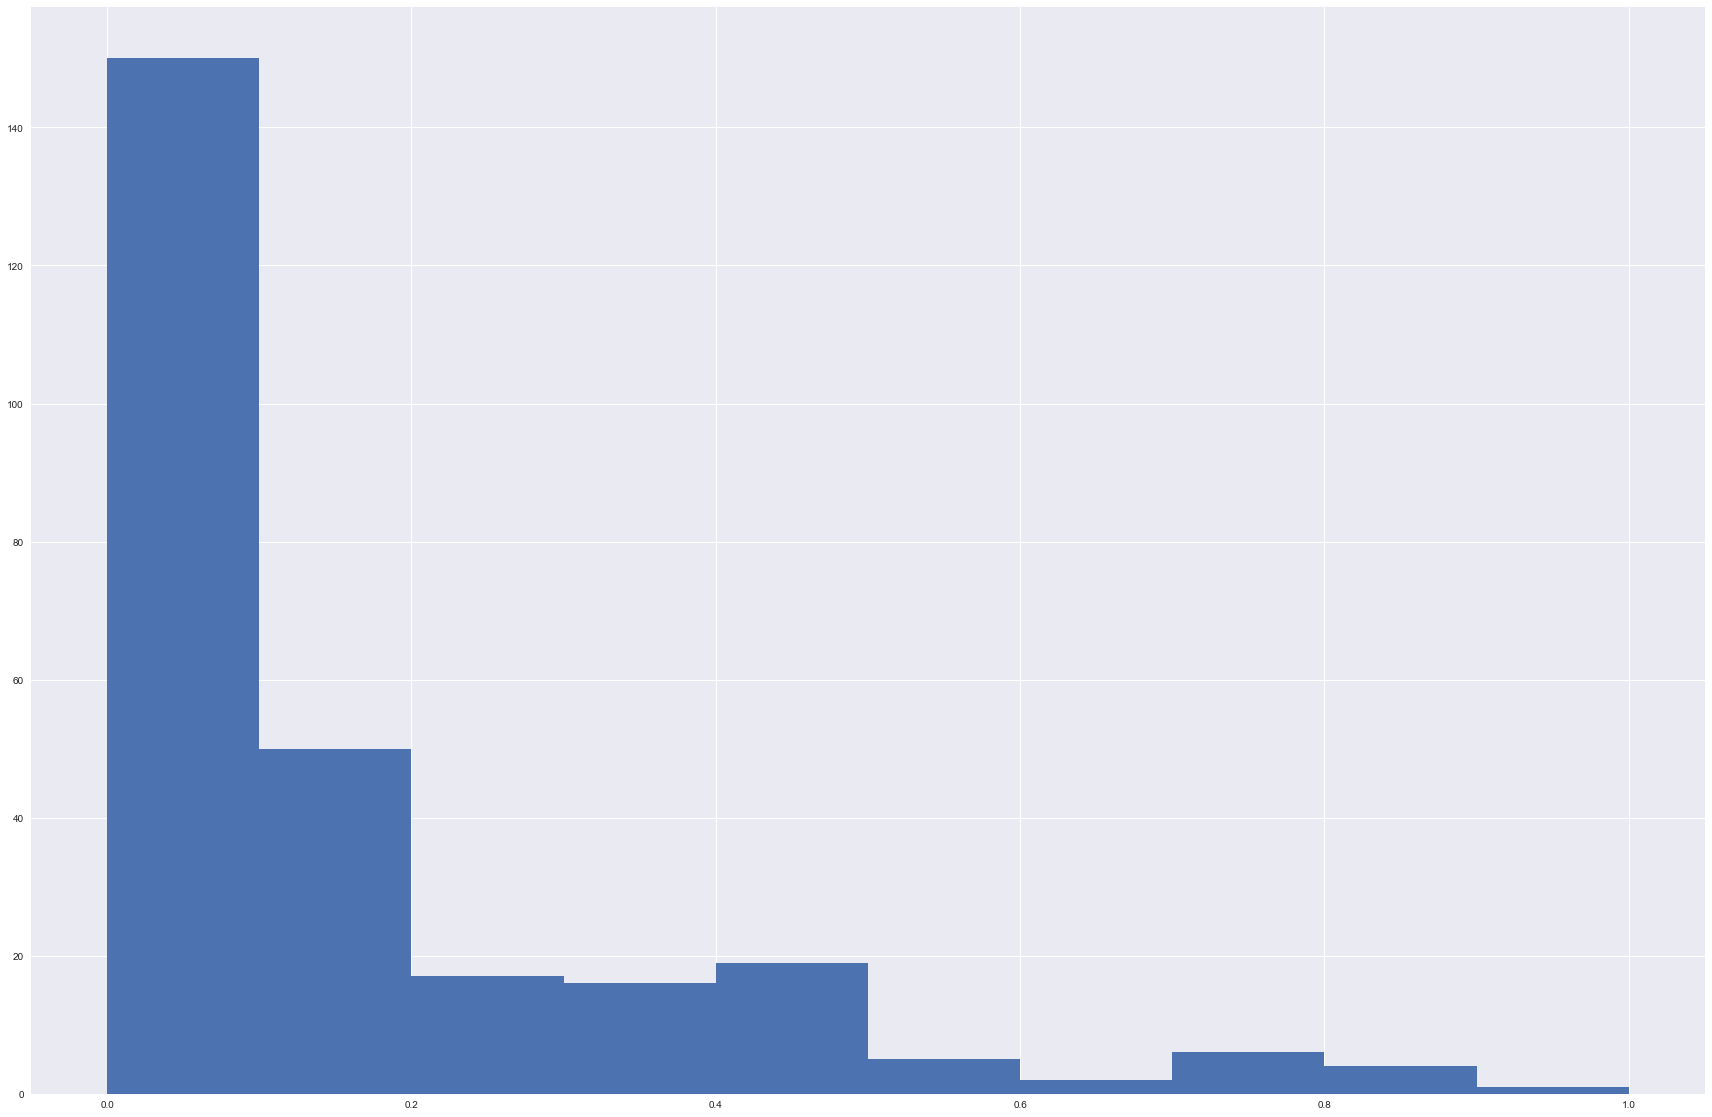

In [44]:
plt.hist(Y_data)

In [12]:
'''
scaler_x = preprocessing.StandardScaler().fit(X_all)
scaler_y = preprocessing.StandardScaler().fit(Y_salary[:,np.newaxis])
X_data = scaler_x.transform(X_all) 
Y_data = scaler_y.transform(Y_salary[:,np.newaxis]) 
#After data scaling
#scaler.inverse_transform(scaler.transform(X_train))→ can get the original data
# Q: 预测时，如何将新数据变化进来和变化出去？
'''

C:\Users\40528\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
df = data_all.iloc[:,3:]
df.corr()

salary       Age         G        GS        MP       PER       TS%  \
salary  1.000000  0.127668  0.377079  0.648781  0.582955  0.597674  0.308301   
Age     0.127668  1.000000 -0.004326  0.010343  0.016079  0.048361  0.109119   
G       0.377079 -0.004326  1.000000  0.618320  0.887215  0.363037  0.283319   
GS      0.648781  0.010343  0.618320  1.000000  0.865747  0.588381  0.311944   
MP      0.582955  0.016079  0.887215  0.865747  1.000000  0.561030  0.348925   
PER     0.597674  0.048361  0.363037  0.588381  0.561030  1.000000  0.733900   
TS%     0.308301  0.109119  0.283319  0.311944  0.348925  0.733900  1.000000   
OWS     0.704836  0.145309  0.488224  0.694707  0.691036  0.749535  0.464086   
DWS     0.633283  0.010587  0.735673  0.756015  0.847903  0.590079  0.320047   
OBPM    0.611267  0.092170  0.391964  0.594490  0.586746  0.953508  0.742481   
DBPM    0.308217 -0.092977  0.346000  0.342329  0.396122  0.215034 -0.050741   
VORP    0.720932  0.065948  0.414843  0.685337  0.646870  0.735790  0.373301   
FG      0.684533  0.010884  0.748531  0.865504  0.924020  0.697157  0.384864   
FGA     0.672554 -0.010843  0.761862  0.865182  0.932232  0.674754  0.355353   
3P      0.618764  0.042775  0.599851  0.686512  0.744188  0.603309  0.402096   
3PA     0.626660  0.018648  0.642866  0.711530  0.785317  0.602419  0.377183   
2P      0.640661 -0.004181  0.734041  0.851838  0.904517  0.664196  0.336551   
2PA     0.623560 -0.025604  0.742607  0.853331  0.909378  0.639821  0.304544   
eFG%    0.228751  0.099753  0.232033  0.245879  0.276295  0.669318  0.955166   
FT      0.681234  0.003123  0.597599  0.769106  0.793216  0.702992  0.368926   
FTA     0.672004 -0.013677  0.615227  0.780420  0.810314  0.693684  0.356962   
ORB     0.516325 -0.105389  0.659348  0.725011  0.793850  0.522407  0.234040   
DRB     0.614830 -0.006756  0.743483  0.792440  0.887312  0.591575  0.294645   
AST     0.656751  0.054286  0.731120  0.854348  0.896527  0.628490  0.299630   
STL     0.585373 -0.036445  0.759291  0.806136  0.893647  0.597515  0.315493   
BLK     0.385684 -0.167735  0.554922  0.586609  0.671122  0.364788  0.188628   
TOV     0.632824 -0.031145  0.735999  0.846812  0.895419  0.610269  0.303291   
PF      0.496404 -0.008912  0.865445  0.745598  0.916222  0.442461  0.303357   
PTS     0.701365  0.013056  0.723609  0.854269  0.906735  0.713431  0.397133   

             OWS       DWS      OBPM    ...           FT       FTA       ORB  \
salary  0.704836  0.633283  0.611267    ...     0.681234  0.672004  0.516325   
Age     0.145309  0.010587  0.092170    ...     0.003123 -0.013677 -0.105389   
G       0.488224  0.735673  0.391964    ...     0.597599  0.615227  0.659348   
GS      0.694707  0.756015  0.594490    ...     0.769106  0.780420  0.725011   
MP      0.691036  0.847903  0.586746    ...     0.793216  0.810314  0.793850   
PER     0.749535  0.590079  0.953508    ...     0.702992  0.693684  0.522407   
TS%     0.464086  0.320047  0.742481    ...     0.368926  0.356962  0.234040   
OWS     1.000000  0.708400  0.783423    ...     0.841635  0.818500  0.604113   
DWS     0.708400  1.000000  0.584281    ...     0.751635  0.766233  0.767722   
OBPM    0.783423  0.584281  1.000000    ...     0.693764  0.678594  0.518447   
DBPM    0.262608  0.615556  0.175931    ...     0.339629  0.366709  0.549756   
VORP    0.911014  0.788726  0.755776    ...     0.847450  0.837106  0.699150   
FG      0.814450  0.840332  0.700285    ...     0.894512  0.897768  0.777440   
FGA     0.781064  0.835827  0.684128    ...     0.897476  0.902340  0.781709   
3P      0.806812  0.691899  0.707429    ...     0.747419  0.727224  0.553007   
3PA     0.792270  0.718627  0.703217    ...     0.789926  0.773776  0.603178   
2P      0.731450  0.816004  0.622939    ...     0.863856  0.876996  0.792931   
2PA     0.689278  0.807481  0.598717    ...     0.857145  0.872842  0.792476   
eFG%    0.364781  0.254887  0.686057    ...     0.224215  0.215842  0.177350   
FT      0

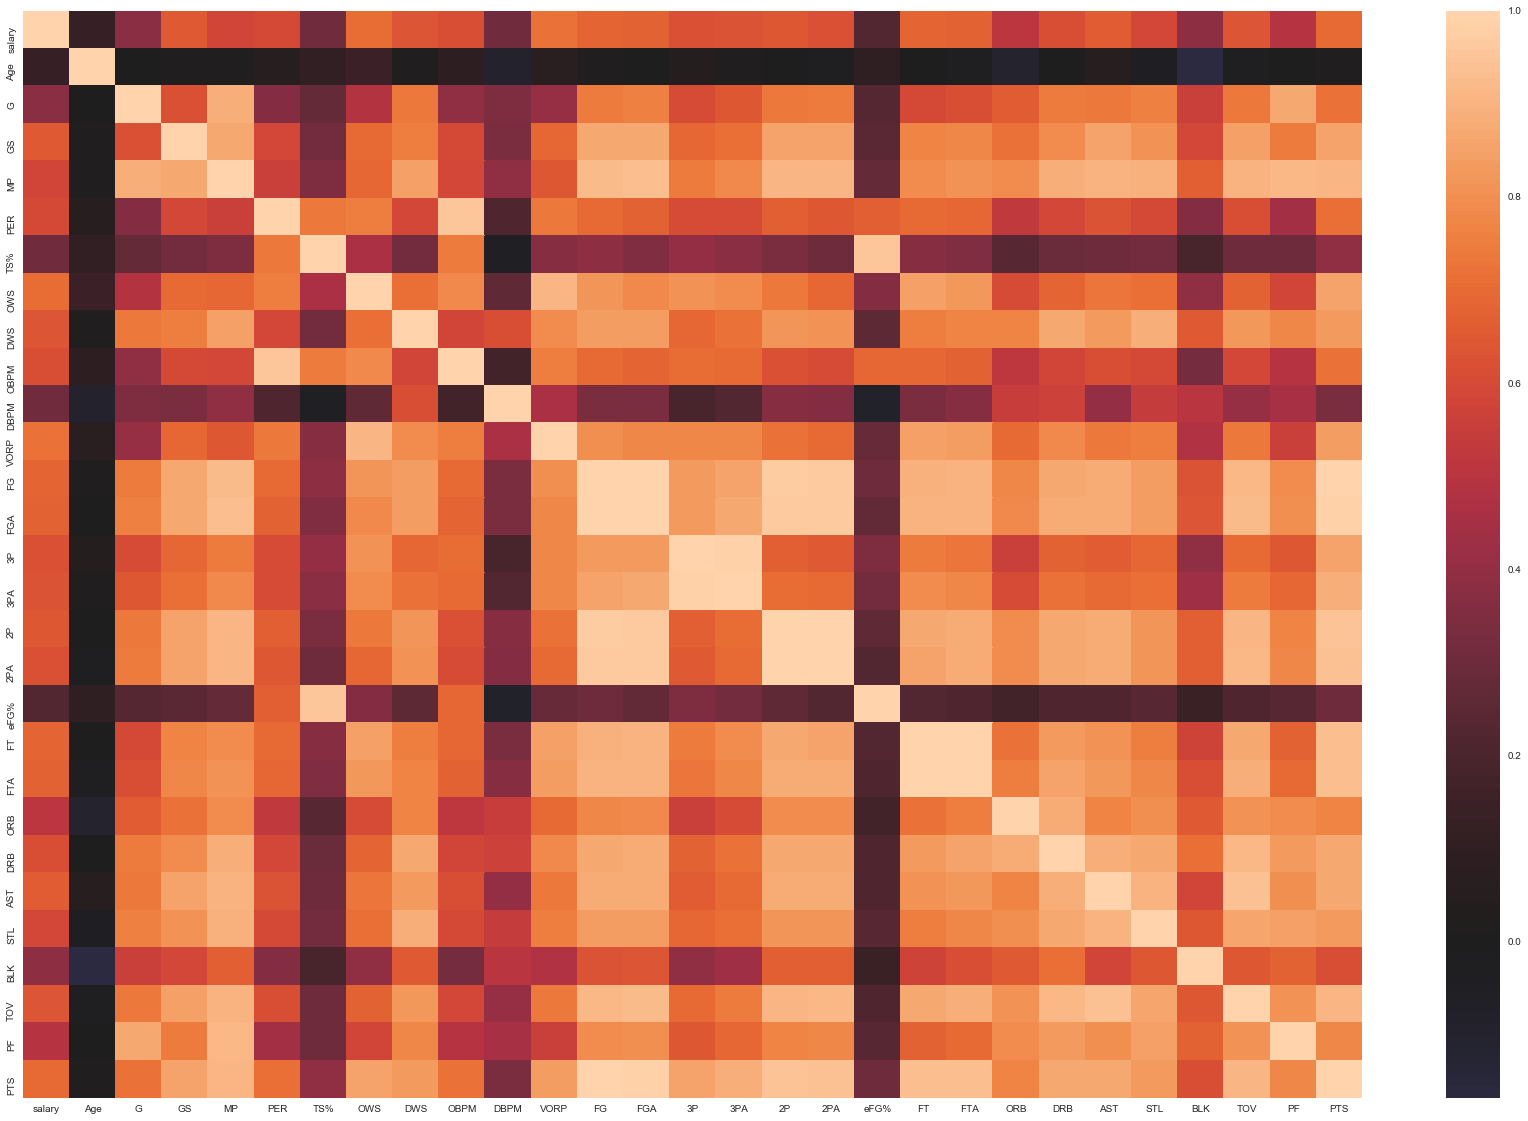

In [28]:
df_corr = df.corr()
import matplotlib.pyplot as mp, seaborn
seaborn.heatmap(df_corr, center=0, annot=False)
mp.show()

In [32]:
'''
X_data = np.delete(X_minmax, [0,5], axis=1)
pd.DataFrame(X_data)
相关性分析再定
'''

0         1         2         3         4         5         6   \
0    0.654321  0.158537  0.436141  0.536489  0.309942  0.130435  0.510135   
1    0.333333  0.012195  0.228940  0.426036  0.222222  0.086957  0.452703   
2    0.938272  0.121951  0.461617  0.522682  0.315789  0.130435  0.516892   
3    0.938272  0.048780  0.582201  0.443787  0.210526  0.434783  0.405405   
4    0.679012  0.670732  0.585598  0.447732  0.292398  0.391304  0.500000   
5    0.987654  0.987805  0.950068  0.587771  0.432749  0.630435  0.540541   
6    1.000000  0.256098  0.639266  0.508876  0.292398  0.326087  0.516892   
7    0.925926  0.524390  0.776155  0.473373  0.239766  0.347826  0.483108   
8    0.506173  0.512195  0.430367  0.447732  0.239766  0.021739  0.466216   
9    0.296296  0.109756  0.124321  0.457594  0.210526  0.065217  0.483108   
10   0.259259  0.146341  0.192255  0.477318  0.216374  0.065217  0.520270   
11   0.493827  0.463415  0.471467  0.477318  0.070175  0.347826  0.418919   
12   0.296296  0.304878  0.256454  0.546351  0.192982  0.282609  0.449324   
13   0.716049  0.463415  0.500340  0.558185  0.309942  0.086957  0.530405   
14   0.567901  0.280488  0.388927  0.420118  0.187135  0.173913  0.412162   
15   0.333333  0.024390  0.230978  0.473373  0.222222  0.065217  0.466216   
16   0.543210  0.548780  0.530571  0.570020  0.368421  0.173913  0.577703   
17   0.851852  0.853659  0.754755  0.591716  0.438596  0.586957  0.591216   
18   0.012346  0.000000  0.001698  0.000000  0.187135  0.000000  0.000000   
19   0.975309  0.975610  0.886549  0.777120  0.865497  0.891304  0.807432   
20   0.407407  0.012195  0.153533  0.426036  0.175439  0.086957  0.395270   
21   0.308642  0.317073  0.306386  0.595661  0.327485  0.108696  0.597973   
22   0.086420  0.000000  0.018682  0.461538  0.192982  0.000000  0.347973   
23   0.296296  0.012195  0.118886  0.355030  0.146199  0.086957  0.304054   
24   1.000000  0.500000  0.616168  0.337278  0.128655  0.217391  0.395270   
25   0.432099  0.000000  0.178668  0.420118  0.204678  0.086957  0.459459   
26   0.345679  0.036585  0.094429  0.469428  0.192982  0.043478  0.422297   
27   0.061728  0.036585  0.057065  0.341223  0.169591  0.021739  0.260135   
28   0.049383  0.000000  0.022079  0.495069  0.198830  0.021739  0.462838   
29   0.543210  0.500000  0.493886  0.467456  0.233918  0.130435  0.483108   
..        ...       ...       ...       ...       ...       ...       ...   
240  0.209877  0.000000  0.075408  0.467456  0.210526  0.021739  0.466216   
241  0.493827  0.024390  0.140285  0.418146  0.192982  0.065217  0.371622   
242  0.827160  0.365854  0.514606  0.441815  0.175439  0.217391  0.429054   
243  0.839506  0.512195  0.625000  0.493097  0.175439  0.586957  0.439189   
244  0.777778  0.780488  0.706182  0.560158  0.333333  0.130435  0.489865   
245  0.901235  0.000000  0.427989  0.437870  0.192982  0.304348  0.398649   
246  0.913580  0.914634  0.837636  0.556213  0.456140  0.369565  0.540541   
247  0.765432  0.731707  0.614130  0.526627  0.210526  0.217391  0.520270   
248  0.962963  0.951220  0.843071  0.542406  0.263158  0.543478  0.506757   
249  0.604938  0.012195  0.274457  0.467456  0.210526  0.130435  0.402027   
250  0.987654  0.390244  0.663043  0.514793  0.245614  0.478261  0.442568   
251  0.469136  0.000000  0.235394  0.412229  0.163743  0.086957  0.354730   
252  0.037037  0.000000  0.016644  0.230769  0.187135  0.000000  0.266892   
253  1.000000  1.000000  0.901495  0.603550  0.526316  0.521739  0.564189   
254  0.925926  0.926829  0.871603  0.747535  0.830409  0.347826  0.780405   
255  0.469136  0.000000  0.189198  0.542406  0.239766  0.108696  0.466216   
256  0.740741  0.182927  0.380435  0.481262  0.210526  0.086957  0.435811   
257  0.444444  0.000000  0.098845  0.431953  0.187135  0.086957  0.378378   
258  0.024691  0.000000  0.012228  0.305720  0.192982  0.000000  0.290541   
259  0.962963  0.963415  0.929348  0.644970  0.538012  0.478261  0.662162   
260  0.

In [10]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = X_data
digits.data.shape 

(270, 20)

Text(0.5,0,'number of components')

Text(0,0.5,'cumulative explained variance')

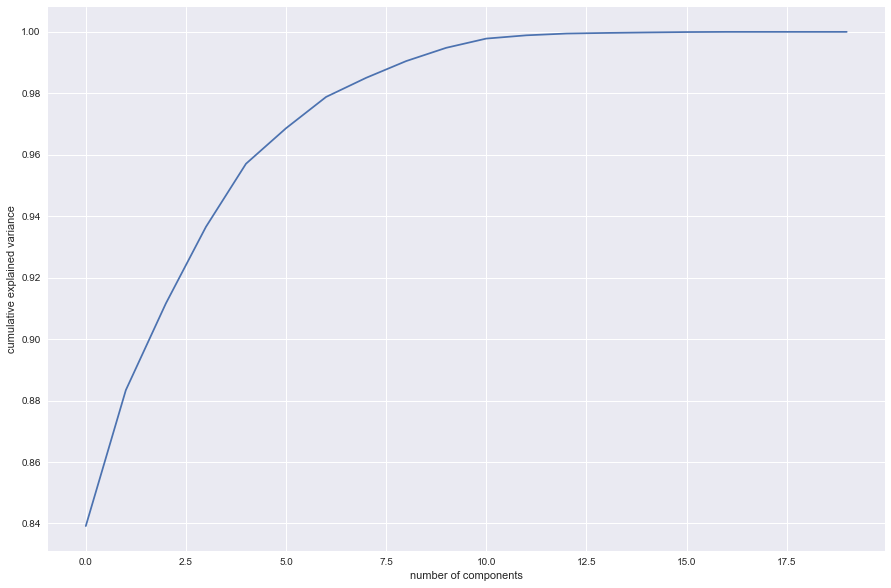

In [11]:
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## PCA

In [12]:
pca = PCA(n_components=0.9)
pca.fit(digits.data)
X_pca = pca.transform(digits.data)
print("original shape: ", X_data.shape)
print("transformed shape:", X_pca.shape)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

original shape:  (270, 20)
transformed shape: (270, 3)


## Linear regression

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True) 
lr.fit(X_data, Y_data) 
#xfit = np.linspace(0, 10, 1000)
# 4. Predict from the model
#yfit = model.predict(xfit[:, np.newaxis])

# Evaluate the model
print(lr.intercept_)
print(lr.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[0.04831087]
[[ 0.14620088 -0.24876808 -0.31064927 -0.19335222  0.23855607  0.41163054
   0.28891316  0.23012178 -0.24301189  0.15030908 -0.10561756  0.20704502
  -0.27845683  0.70539219 -0.5431466   0.00156904  0.57807667 -0.25101096
  -0.37788079  0.37759481]]


In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_data, Y_data, cv=10)

array([ 0.04962459, -0.25635025,  0.36104203, -0.06261967,  0.74002911,
        0.32919943,  0.63104721,  0.646591  ,  0.6211166 ,  0.51157018])

In [160]:
'''
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print 'R-squared value of linear regression is',lr.score(X_test,y_test)
print 'the MSE of linear regression is',mean_squared_error(min_max_scaler.inverse_transform(Y_data),ss_y.inverse_transform(linear_svr_y_predict))
print 'the MAE of linear regression is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(linear_svr_y_predict))
可以只使用CV进行评价测试
'''


In [77]:
r_score = lr.score(X_data, Y_data)
r_score

0.6071287241099108

## Poly regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 1)

In [73]:
#对训练集进行拟合标准化处理
x_pol = pol.fit_transform(X_data)
#模型初始化
lr_pol = LinearRegression()
#拟合
lr_pol.fit(x_pol, Y_data)
print(lr_pol.intercept_)
print(lr_pol.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

[0.049219]
[[ 0.00000000e+00  1.46222420e-01 -2.49290717e-01 -3.11108154e-01
  -1.92992041e-01  2.38929550e-01  4.11550495e-01  2.88759910e-01
   1.42826147e+12  5.45174080e+11 -2.17265563e+11 -2.48981564e+11
  -5.85364047e+11 -3.81340838e+11  2.96625870e+11 -5.44448853e-01
   1.46484375e-03  5.77941895e-01 -2.51342773e-01 -3.77197266e-01
  -1.01711659e+12]]


In [74]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_pol,pol.transform(X_data), Y_data, cv=10)

array([ 0.04962459, -0.25635025,  0.36104203, -0.06261967,  0.74002911,
        0.32919943,  0.63645973,  0.64759772,  0.6211166 ,  0.51157018])

In [19]:
r_score = lr_pol.score(pol.transform(X_pca), Y_data)
r_score

0.5583988458108284

## SVM regression

In [67]:
from sklearn.svm import SVR
# Grid search
from sklearn.model_selection import GridSearchCV
# Here we can give it a range of hyperparamters to test the model with
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[4,5]}
model_test = SVR() # don't initalise any paramters now
grid = GridSearchCV(model_test, parameters, cv=10, n_jobs=-1)
grid.fit(X_data,Y_data.flatten())
grid.best_params_
#用PCA后的数据c最佳为939，原数据最佳为5

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'C': 5, 'kernel': 'rbf'}

In [29]:
'''
from sklearn.grid_search import RandomizedSearchCV
grid = RandomizedSearchCV(model,parameters,cv = 3,scoring = 'neg_log_loss',n_iter=6,n_jobs = -1)
grid.fit(X_pca,Y_data)
grid.best_params_
'''

"\nfrom sklearn.grid_search import RandomizedSearchCV\ngrid = RandomizedSearchCV(model,parameters,cv = 3,scoring = 'neg_log_loss',n_iter=6,n_jobs = -1)\ngrid.fit(X_pca,Y_data)\ngrid.best_params_\n"

In [79]:
svr = SVR(kernel='linear',C=939)
svr.fit(X_pca,Y_data.flatten())
# linear_svr_y_predict = linear_svr.predict(X_test)

SVR(C=939, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [80]:
cross_val_score(svr, X_pca, Y_data.flatten(), cv=10)

array([ 0.10526483, -0.01231917,  0.24951187,  0.15346699,  0.73659384,
        0.35231431,  0.68578435,  0.63351132,  0.60037967,  0.52555376])

In [81]:
r_score = svr.score(X_pca, Y_data)
r_score

0.5333633293676834

## Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
forest = RandomForestRegressor(n_estimators=1000, random_state=1, n_jobs=-1, min_samples_leaf = 10)
forest.fit(X_pca,Y_data.flatten())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [115]:
cross_val_score(forest, X_pca, Y_data.flatten(), cv=10)

array([ 0.24756488, -0.18975725,  0.21554548,  0.23992248,  0.67971385,
        0.30539661,  0.69809276,  0.57659486,  0.58315058,  0.61275893])

In [116]:
r_score = forest.score(X_pca, Y_data)
r_score

0.6294704091597827

In [110]:
from sklearn.metrics import roc_auc_score
sample_leaf_options = [1,5,10,50,100,200,500]
 
for leaf_size in sample_leaf_options :
    forest_test = RandomForestRegressor(n_estimators = 1000, n_jobs = -1,random_state =50, min_samples_leaf = leaf_size)
    forest_test.fit(X_data,Y_data.flatten())
    print (cross_val_score(forest_test, X_data, Y_data.flatten(), cv=10))
    print (forest_test.score(X_data, Y_data))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

[0.1281732  0.01103452 0.18666423 0.32306802 0.74031832 0.62901128
 0.66468361 0.6669656  0.76582233 0.49359019]
0.9385057829992854


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

[0.11491472 0.0488585  0.18071892 0.29153963 0.77532373 0.63255526
 0.68652143 0.63644521 0.7275928  0.53135144]
0.8114566606274364


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

[0.20701792 0.03899375 0.22244586 0.28250899 0.76934236 0.58555081
 0.70910313 0.60064246 0.68608846 0.59294639]
0.7148557412462173


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

[0.29388838 0.22153053 0.02079011 0.34736804 0.63821594 0.34836445
 0.4354442  0.47198178 0.42831175 0.52048499]
0.48973563963620076


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

[-2.07889891e-01 -1.76463927e-04 -4.99601684e-02 -4.44896444e-03
 -1.64592250e-03 -2.67312478e-03 -7.73933034e-04 -4.71977052e-05
 -4.01533854e-03 -2.64036701e-03]
-3.5821245287781522e-06


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=200, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

[-2.07889891e-01 -1.76463927e-04 -4.99601684e-02 -4.44896444e-03
 -1.64592250e-03 -2.67312478e-03 -7.73933034e-04 -4.71977052e-05
 -4.01533854e-03 -2.64036701e-03]
-3.5821245287781522e-06


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

[-2.07889891e-01 -1.76463927e-04 -4.99601684e-02 -4.44896444e-03
 -1.64592250e-03 -2.67312478e-03 -7.73933034e-04 -4.71977052e-05
 -4.01533854e-03 -2.64036701e-03]
-3.5821245285561076e-06
